In [1]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import glob
import IPython.display as ipd
import random
%pylab inline

import warnings
warnings.filterwarnings('ignore')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\kadah\anaconda3\Lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
df = pd.read_csv(r"D:\Urban Audio\UrbanSound8K.csv")
df.head()

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing

In [3]:
df['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


In [5]:
df.describe()

fsID        start          end     salience         fold  \
count    8732.000000  8732.000000  8732.000000  8732.000000  8732.000000   
mean   116033.493816    38.645409    42.253312     1.347000     5.385937   
std     57991.017218    74.292126    74.369669     0.476043     2.846820   
min       344.000000     0.000000     0.105962     1.000000     1.000000   
25%     69942.250000     3.000000     6.839398     1.000000     3.000000   
50%    118279.000000    10.376492    14.000000     1.000000     5.000000   
75%    166942.000000    35.131372    38.866979     2.000000     8.000000   
max    209992.000000   600.125356   604.125356     2.000000    10.000000   

           classID  
count  8732.000000  
mean      4.592877  
std       2.894544  
min       0.000000  
25%       2.000000  
50%       4.000000  
75%       7.000000  
max       9.000000

In [6]:
df.shape

(8732, 8)

In [7]:
df.isnull().sum()

slice_file_name    0
fsID               0
start              0
end                0
salience           0
fold               0
classID            0
class              0
dtype: int64

<Axes: >

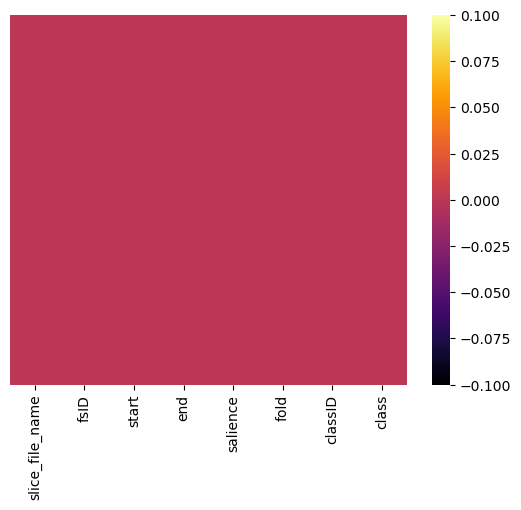

In [8]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cmap="inferno")

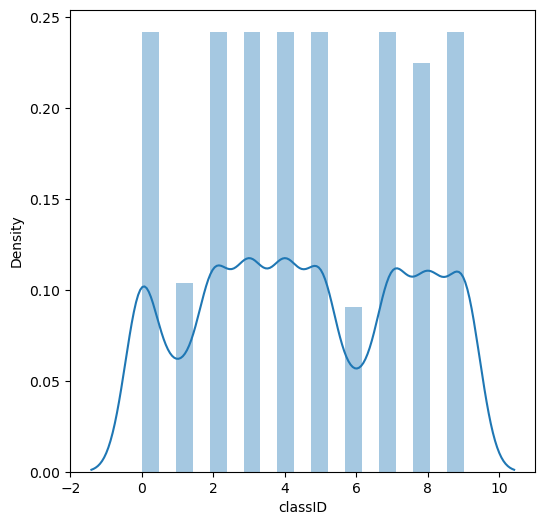

In [9]:
plt.figure(figsize=(6,6))
sns.distplot(df['classID'])
plt.show()

# Which classId has less count?

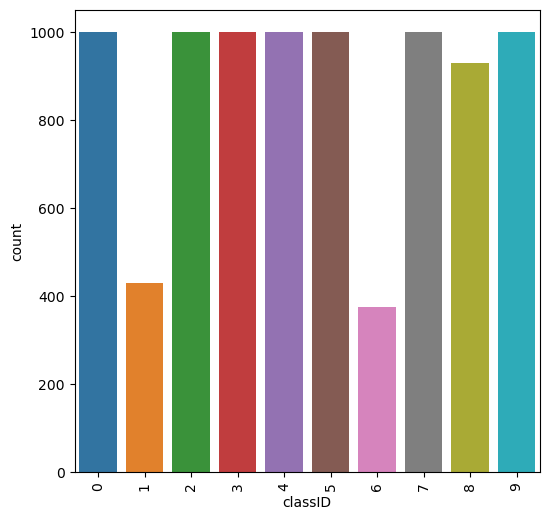

In [10]:
plt.figure(figsize=(6,6))
sns.countplot(x='classID',data=df)
plt.xticks(rotation=90)
plt.show()

# Class 1 (car_horn)and class 6(gun_shot)  has less number of counts.

# What is the percentage of each classes?

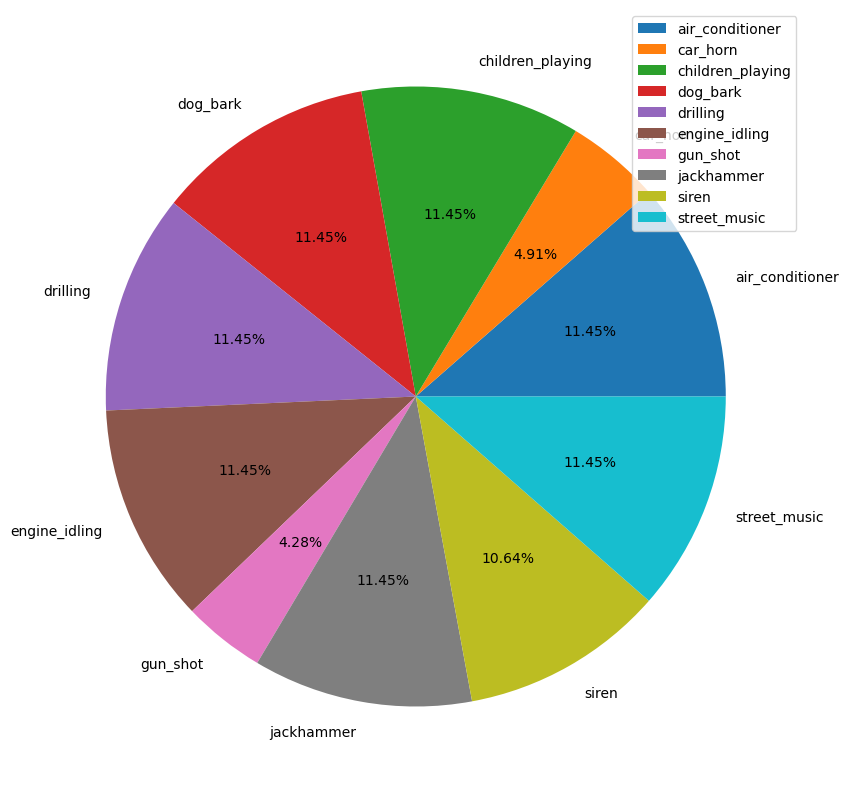

In [11]:
plt.figure(figsize=(10,12))
b=df.groupby("class")["class"].count()
plt.pie(b,labels=b.index,autopct="%.2f%%")
plt.legend(loc='upper right')
plt.show()

# Which classes has less percentage?

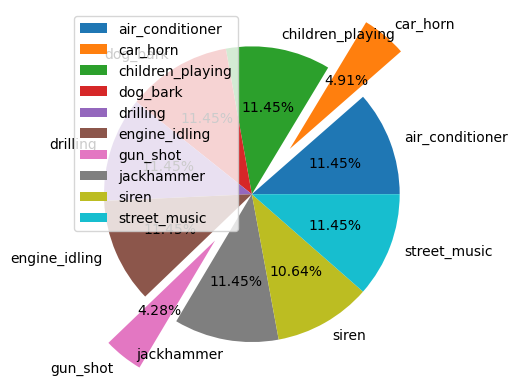

In [12]:
b = df.groupby("class")["class"].count()
explode_list = [0,0.4,0,0,0,0,0.4,0,0,0]
plt.pie(b, labels=b.index, autopct="%.2f%%", explode=explode_list)
plt.legend()
plt.show()

# car_horn & gun_shot classes has the less percentage which is less the 5%.

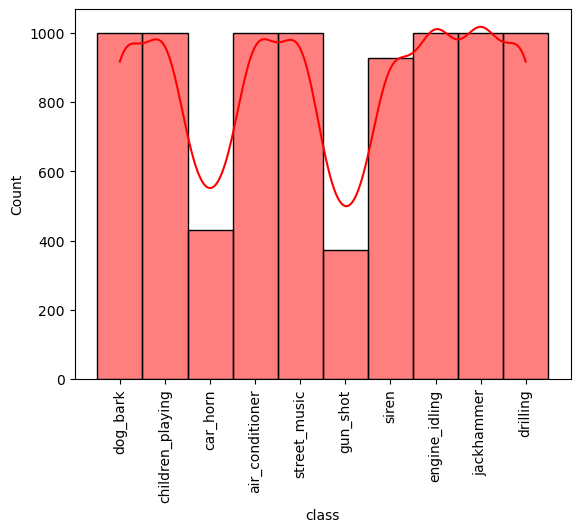

In [13]:
sns.histplot(df["class"], bins=10, kde=True, color='red',edgecolor='black')
plt.xticks(rotation=90)  # Correcting the method name and providing the rotation angle
plt.show()

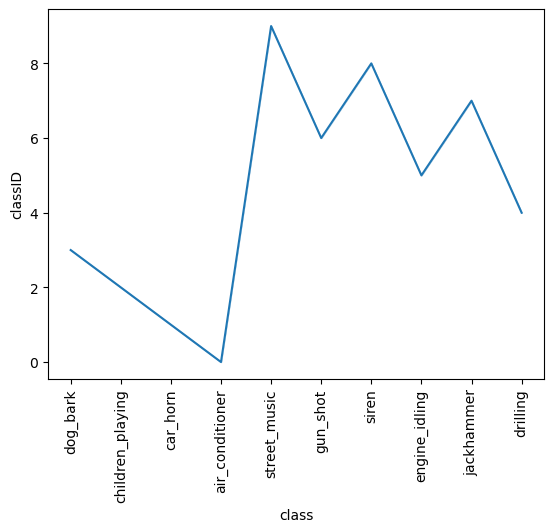

In [14]:
sns.lineplot(x='class', y='classID', data=df)
plt.xticks(rotation=90)
plt.show()

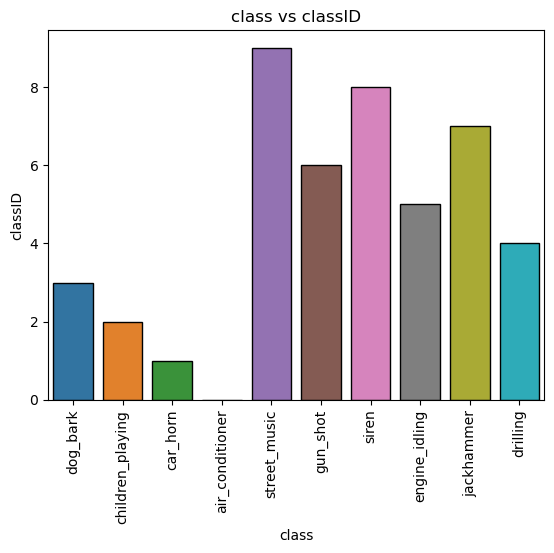

In [15]:
sns.barplot(x='class', y='classID',data=df, orient='v',edgecolor='black')
plt.title ('class vs classID')
plt.xticks(rotation=90)
plt.show()

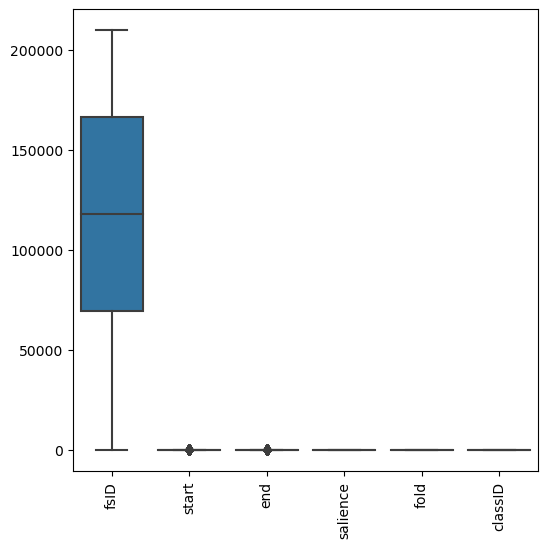

In [16]:
plt.figure(figsize=(6,6))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

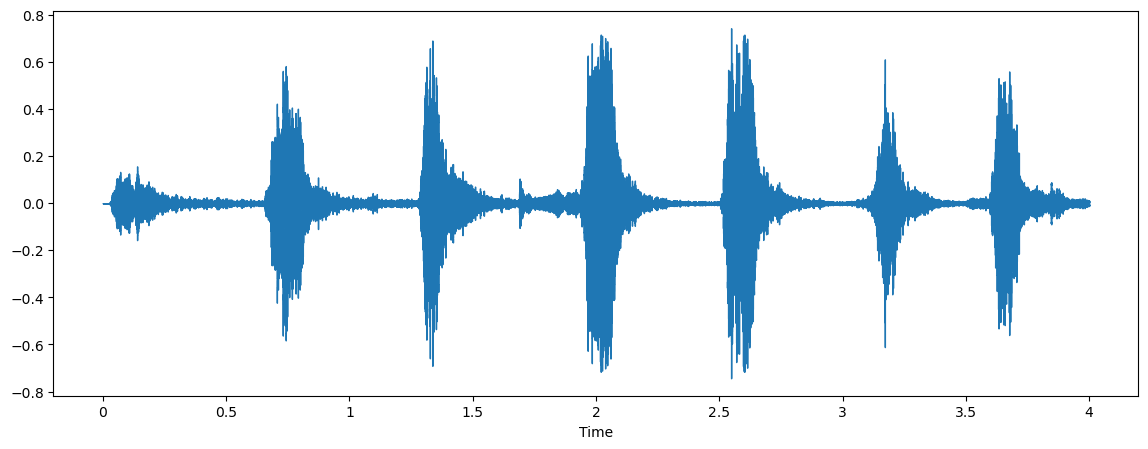

In [17]:
# Dog sound
filename=r'D:\Urban Audio\fold2\100652-3-0-0.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

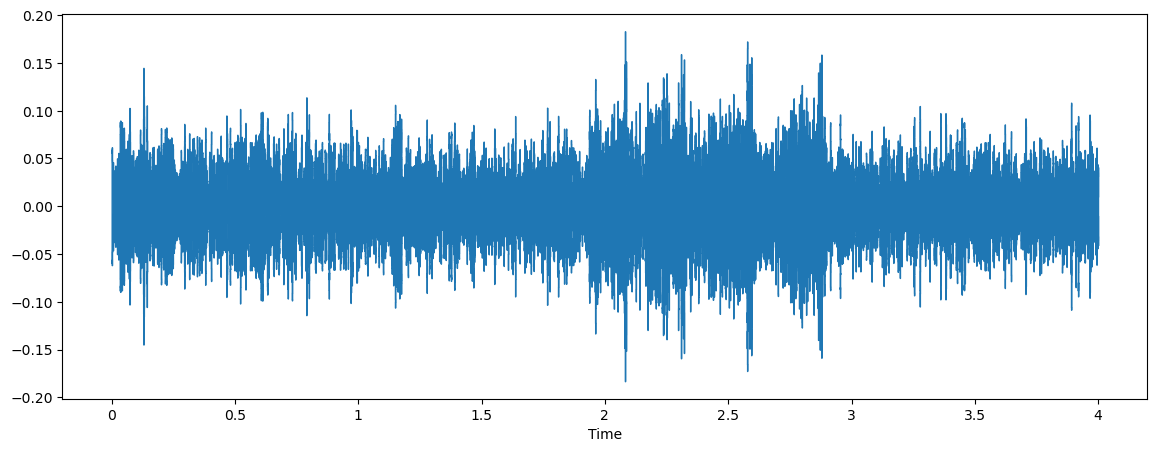

In [18]:
# Bird Sound
filename=r"D:\Urban Audio\fold2\160011-2-0-1.wav"
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

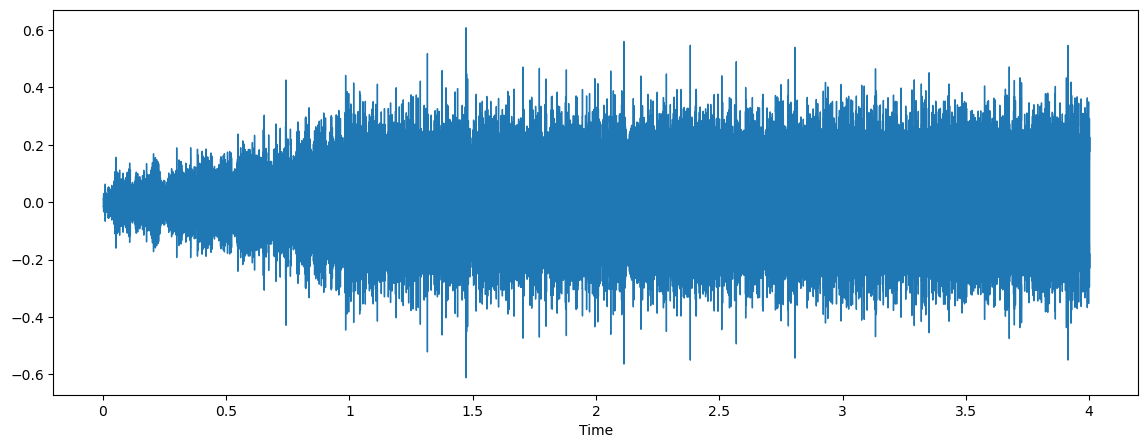

In [19]:
# Drilling Sound
filename=r"D:\Urban Audio\fold3\103357-4-0-0.wav"
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

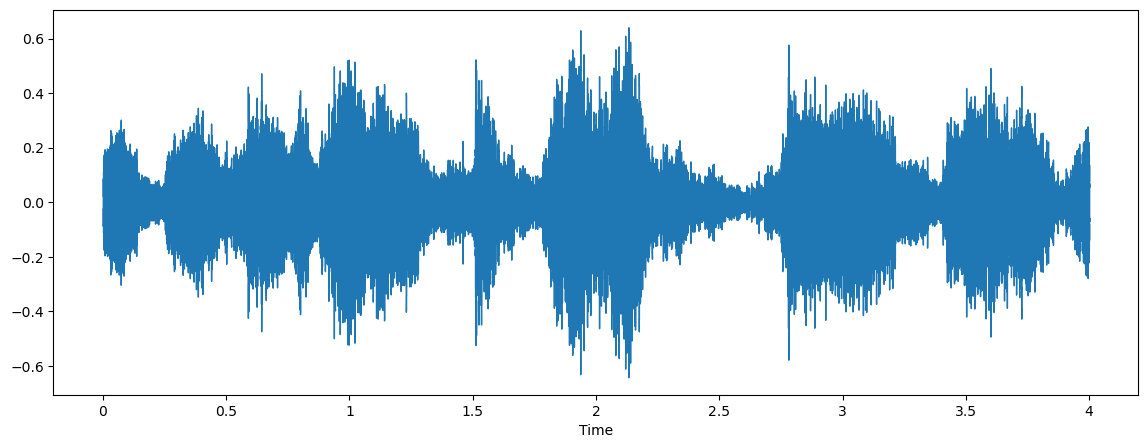

In [20]:
# Street music 
filename=r"D:\Urban Audio\fold5\105425-9-0-23.wav"
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

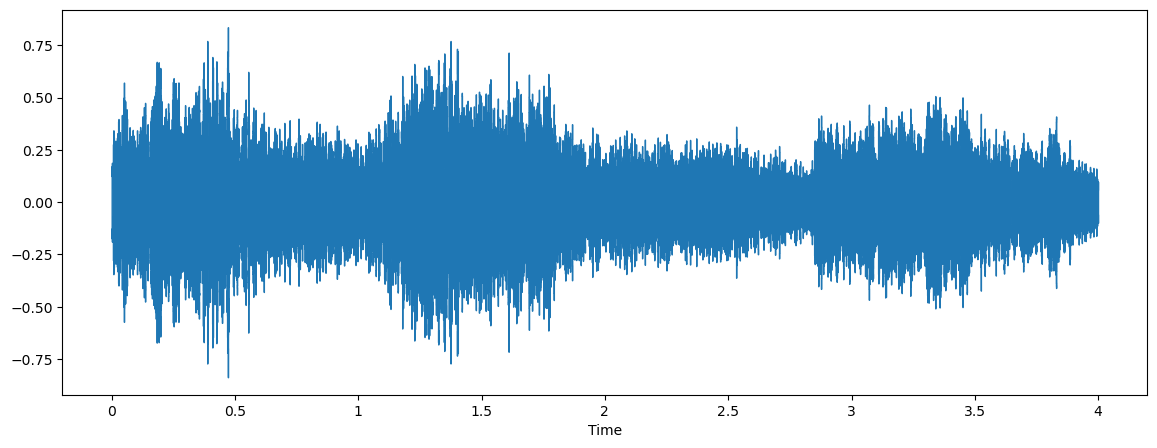

In [21]:
# Car horn
filename=r"D:\Urban Audio\fold6\128465-1-0-6.wav"
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [22]:
sample_rate

22050

In [23]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [24]:
wave_sample_rate

48000

In [25]:
audio_file_path=r'D:\Urban Audio\fold2\100652-3-0-0.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [26]:
print(librosa_audio_data)

[-4.1909516e-09 -1.9790605e-09 -1.6298145e-09 ...  6.3789585e-03
  2.4849751e-03 -3.8281479e-04]


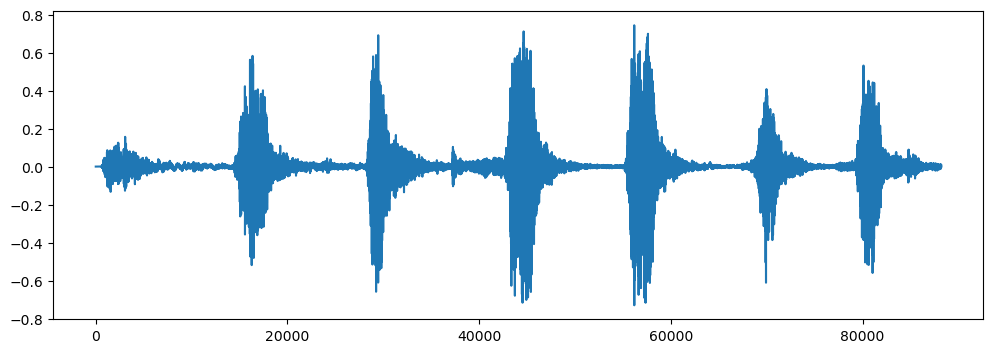

In [27]:
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [28]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [29]:
wave_audio

array([[   0,    0],
       [   0,    0],
       [   0,    0],
       ...,
       [-220,  193],
       [-211,  203],
       [-169,  209]], dtype=int16)

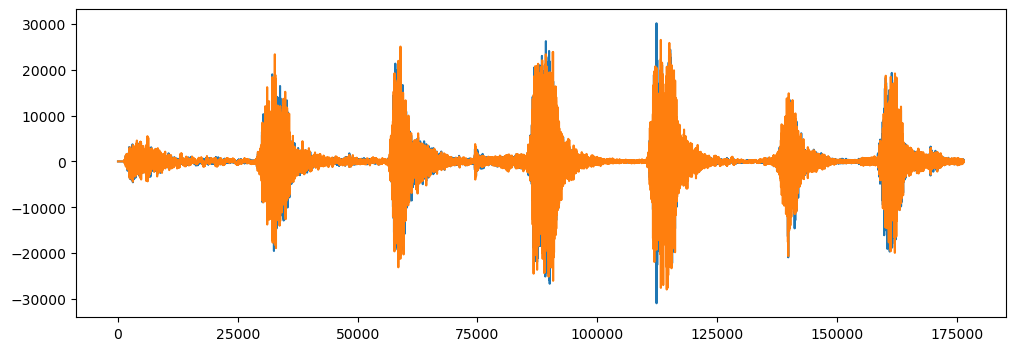

In [30]:
# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

# Extract Features


Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [31]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [32]:
mfccs

array([[-5.4015735e+02, -3.8647202e+02, -2.9487515e+02, ...,
        -3.2097778e+02, -3.2452646e+02, -3.4993683e+02],
       [ 3.7687950e+01,  9.8727448e+01,  1.0977669e+02, ...,
         8.7304565e+01,  7.9169693e+01,  7.7821648e+01],
       [-2.8607426e+01, -1.0099413e+02, -1.2499402e+02, ...,
        -5.6868019e+01, -6.1326271e+01, -5.8022285e+01],
       ...,
       [ 4.2923889e-01, -3.9176369e-01,  5.5127840e+00, ...,
         3.8616004e+00,  2.6449604e+00,  3.9021304e+00],
       [ 1.3075355e+00, -2.0271196e+00, -3.7877595e+00, ...,
         4.3491712e+00,  3.2855093e+00,  4.7606792e+00],
       [ 5.8787079e+00,  8.7677650e+00,  2.6843066e+00, ...,
        -6.5524158e+00, -2.4216232e+00,  7.2140813e-01]], dtype=float32)

In [33]:
audio_dataset_path=r"D:\Urban Audio"
metadata=pd.read_csv(r"D:\Urban Audio\UrbanSound8K.csv")
metadata.head()

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing

In [34]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [35]:
#"tqdm" stands for "taqaddum"
from tqdm import tqdm
import os
# Now we iterate through every audio file and extract features 
# using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(df.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

8732it [08:58, 16.21it/s]


In [36]:
# converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

feature             class
0  [-217.35526, 70.22338, -130.38527, -53.282898,...          dog_bark
1  [-424.09818, 109.34077, -52.919525, 60.86475, ...  children_playing
2  [-458.79114, 121.38419, -46.52066, 52.00812, -...  children_playing
3  [-413.89984, 101.66373, -35.42945, 53.036358, ...  children_playing
4  [-446.60352, 113.68541, -52.402214, 60.302044,...  children_playing

In [37]:
# Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [38]:
X.shape

(8732, 40)

In [39]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [40]:
# Label Encoding
#y=np.array(pd.get_dummies(y))
# Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [41]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [42]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [43]:
X_train.shape

(6985, 40)

In [44]:
X_test.shape

(1747, 40)

# Model Creation

In [45]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [47]:
# No of classes
num_labels=y.shape[1]

In [48]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [50]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [51]:
# Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100


206/219 [===========================>..] - ETA: 0s - loss: 11.2964 - accuracy: 0.1288
Epoch 1: val_loss improved from inf to 2.27751, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 3s 5ms/step - loss: 10.8311 - accuracy: 0.1283 - val_loss: 2.2775 - val_accuracy: 0.1242
Epoch 2/100
208/219 [===========================>..] - ETA: 0s - loss: 2.5662 - accuracy: 0.1300
Epoch 2: val_loss improved from 2.27751 to 2.27209, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 2.5553 - accuracy: 0.1288 - val_loss: 2.2721 - val_accuracy: 0.1225
Epoch 3/100
211/219 [===========================>..] - ETA: 0s - loss: 2.3215 - accuracy: 0.1256
Epoch 3: val_loss improved from 2.27209 to 2.24858, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 2.3190 - accuracy: 0.1266 - val_loss: 2.2486 - val_accuracy: 0.

219/219 [==============================] - 1s 4ms/step - loss: 1.4503 - accuracy: 0.4915 - val_loss: 1.2374 - val_accuracy: 0.5999
Epoch 25/100
202/219 [==========================>...] - ETA: 0s - loss: 1.4267 - accuracy: 0.5005
Epoch 25: val_loss did not improve from 1.23740
219/219 [==============================] - 1s 3ms/step - loss: 1.4265 - accuracy: 0.5002 - val_loss: 1.2435 - val_accuracy: 0.6102
Epoch 26/100
219/219 [==============================] - ETA: 0s - loss: 1.4079 - accuracy: 0.5058
Epoch 26: val_loss improved from 1.23740 to 1.19608, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.4079 - accuracy: 0.5058 - val_loss: 1.1961 - val_accuracy: 0.6365
Epoch 27/100
216/219 [============================>.] - ETA: 0s - loss: 1.3784 - accuracy: 0.5175
Epoch 27: val_loss did not improve from 1.19608
219/219 [==============================] - 1s 3ms/step - loss: 1.3780 - accuracy: 0.5175 - val_loss: 1.2214 -

217/219 [============================>.] - ETA: 0s - loss: 1.1452 - accuracy: 0.6076
Epoch 51: val_loss did not improve from 0.96139
219/219 [==============================] - 1s 3ms/step - loss: 1.1454 - accuracy: 0.6080 - val_loss: 0.9801 - val_accuracy: 0.6898
Epoch 52/100
218/219 [============================>.] - ETA: 0s - loss: 1.1508 - accuracy: 0.6071
Epoch 52: val_loss improved from 0.96139 to 0.93161, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.1503 - accuracy: 0.6072 - val_loss: 0.9316 - val_accuracy: 0.6926
Epoch 53/100
217/219 [============================>.] - ETA: 0s - loss: 1.1329 - accuracy: 0.6211
Epoch 53: val_loss did not improve from 0.93161
219/219 [==============================] - 1s 3ms/step - loss: 1.1315 - accuracy: 0.6213 - val_loss: 0.9674 - val_accuracy: 0.6961
Epoch 54/100
214/219 [============================>.] - ETA: 0s - loss: 1.1298 - accuracy: 0.6195
Epoch 54: val_loss did n

217/219 [============================>.] - ETA: 0s - loss: 1.0481 - accuracy: 0.6485
Epoch 79: val_loss did not improve from 0.86605
219/219 [==============================] - 1s 3ms/step - loss: 1.0470 - accuracy: 0.6484 - val_loss: 0.8975 - val_accuracy: 0.7355
Epoch 80/100
212/219 [============================>.] - ETA: 0s - loss: 1.0363 - accuracy: 0.6493
Epoch 80: val_loss improved from 0.86605 to 0.85989, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.0359 - accuracy: 0.6495 - val_loss: 0.8599 - val_accuracy: 0.7184
Epoch 81/100
215/219 [============================>.] - ETA: 0s - loss: 1.0466 - accuracy: 0.6481
Epoch 81: val_loss improved from 0.85989 to 0.85581, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.0463 - accuracy: 0.6480 - val_loss: 0.8558 - val_accuracy: 0.7270
Epoch 82/100
218/219 [============================>.] - ETA: 0

In [52]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7498568892478943


In [53]:
X_test[1]

array([-466.17957   ,    1.0950246 ,  -34.01389   ,   35.33935   ,
        -14.88148   ,  -19.12843   ,   -0.581684  ,  -16.130577  ,
        -21.339075  ,    7.673635  ,  -29.16449   ,  -18.950253  ,
         -2.9579995 ,   -8.162331  ,  -15.153101  ,   -6.6048055 ,
         -7.5685973 ,    9.340646  ,   14.4331    ,   21.934181  ,
         20.861397  ,    1.3340123 ,  -19.228804  ,   -4.630231  ,
         -1.0564744 ,    3.215267  ,   -6.984281  ,  -16.414577  ,
        -10.0286455 ,   13.009954  ,    0.53346074,  -23.843391  ,
        -15.267321  ,    9.245734  ,   10.367627  ,   -0.583201  ,
         -1.2624055 ,   17.700016  ,   13.847462  ,   -5.1862826 ],
      dtype=float32)

In [54]:
predicted_classes = model.predict(X_test)
predicted_classes = np.argmax(predicted_classes, axis=1)

55/55 [==============================] - 0s 1ms/step


# TESTING AUDIO 

In [57]:
filename=r"D:\Urban Audio\fold4\24347-8-0-14.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

In [58]:
print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_probabilities = model.predict(mfccs_scaled_features)
predicted_label = np.argmax(predicted_probabilities, axis=1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-2.5260793e+02  1.5645448e+02 -5.4642353e+01  8.0104208e+00
 -1.8235594e+01  1.6998831e+01  2.0567055e+00  1.6047220e+01
 -8.9122362e+00  1.9719061e+01  2.5252199e+00  1.4858405e+01
 -2.1041319e+00  5.4895725e+00 -2.0234461e+00  6.8370080e-01
 -5.1709690e+00  4.4337711e+00 -4.0199676e+00  1.5472360e+00
  8.3085006e-01  2.1178894e+00 -2.7111605e-02  1.6055654e+00
 -1.1471344e+00  1.4037603e+00  9.5036113e-01  9.4815665e-01
 -2.1958492e+00 -2.0054059e+00  1.0772953e+00 -5.8389717e-01
  7.0311117e-01 -1.1142054e+00 -1.7799629e-01 -1.8233322e-01
  2.4653275e+00 -9.7967774e-01 -1.6545523e+00 -9.4663614e-01]
[[-2.5260793e+02  1.5645448e+02 -5.4642353e+01  8.0104208e+00
  -1.8235594e+01  1.6998831e+01  2.0567055e+00  1.6047220e+01
  -8.9122362e+00  1.9719061e+01  2.5252199e+00  1.4858405e+01
  -2.1041319e+00  5.4895725e+00 -2.0234461e+00  6.8370080e-01
  -5.1709690e+00  4.4337711e+00 -4.0199676e+00  1.5472360e+00
   8.3085006e-01  2.1178894e+00 -2.7111605e-02  1.6055654e+00
  -1.1471344e+00 

array(['siren'], dtype='<U16')